## File Import

In [1]:
import pandas as pd
import numpy as np

In [2]:
links = pd.read_csv("links.csv")
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
gen_tags = pd.read_csv("genome-tags.csv")
gen_scores = pd.read_csv("genome-scores.csv")
data = pd.read_csv("movies_metadata.csv")

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [4]:
movies

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

In [158]:
#convert genres into list

genres=[]

for i in movies["genres"]:
    i=i.split("|")
    genres.append(i)
    
movies["genres"] = genres

In [159]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]

In [5]:
ratings['timestamp']= pd.to_datetime(ratings['timestamp'], unit='s')
ratings = ratings.rename(columns={"timestamp": "rating_timestamp"})
ratings

userId  movieId  rating    rating_timestamp
0            1        1     4.0 2000-07-30 18:45:03
1            1        3     4.0 2000-07-30 18:20:47
2            1        6     4.0 2000-07-30 18:37:04
3            1       47     5.0 2000-07-30 19:03:35
4            1       50     5.0 2000-07-30 18:48:51
...        ...      ...     ...                 ...
100831     610   166534     4.0 2017-05-03 21:53:22
100832     610   168248     5.0 2017-05-03 22:21:31
100833     610   168250     5.0 2017-05-08 19:50:47
100834     610   168252     5.0 2017-05-03 21:19:12
100835     610   170875     3.0 2017-05-03 21:20:15

[100836 rows x 4 columns]

In [6]:
tags['timestamp']= pd.to_datetime(tags['timestamp'], unit='s')
tags = tags.rename(columns={"timestamp": "tag_timestamp"})
tags


userId  movieId            tag       tag_timestamp
0           18     4141    Mark Waters 2009-04-24 18:19:40
1           65      208      dark hero 2013-05-10 01:41:18
2           65      353      dark hero 2013-05-10 01:41:19
3           65      521  noir thriller 2013-05-10 01:39:43
4           65      592      dark hero 2013-05-10 01:41:18
...        ...      ...            ...                 ...
465559  138446    55999        dragged 2013-01-23 23:29:32
465560  138446    55999  Jason Bateman 2013-01-23 23:29:38
465561  138446    55999         quirky 2013-01-23 23:29:38
465562  138446    55999            sad 2013-01-23 23:29:32
465563  138472      923  rise to power 2007-11-02 21:12:47

[465564 rows x 4 columns]

In [7]:
gen_tags

tagId           tag
0         1           007
1         2  007 (series)
2         3  18th century
3         4         1920s
4         5         1930s
...     ...           ...
1123   1124       writing
1124   1125         wuxia
1125   1126          wwii
1126   1127        zombie
1127   1128       zombies

[1128 rows x 2 columns]

In [8]:
gen_scores

movieId  tagId  relevance
0               1      1    0.02500
1               1      2    0.02500
2               1      3    0.05775
3               1      4    0.09675
4               1      5    0.14675
...           ...    ...        ...
11709763   131170   1124    0.58775
11709764   131170   1125    0.01075
11709765   131170   1126    0.01575
11709766   131170   1127    0.11450
11709767   131170   1128    0.02175

[11709768 rows x 3 columns]

In [161]:
genome = gen_scores.join( gen_tags.set_index('tagId'), on='tagId') 
genome

movieId  tagId  relevance           tag
0               1      1    0.02500           007
1               1      2    0.02500  007 (series)
2               1      3    0.05775  18th century
3               1      4    0.09675         1920s
4               1      5    0.14675         1930s
...           ...    ...        ...           ...
11709763   131170   1124    0.58775       writing
11709764   131170   1125    0.01075         wuxia
11709765   131170   1126    0.01575          wwii
11709766   131170   1127    0.11450        zombie
11709767   131170   1128    0.02175       zombies

[11709768 rows x 4 columns]

### Cleaning of the metadata columns

In [179]:
cl_data = data[data["status"]=="Released"]
cl_data

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [180]:
cl_data = cl_data.drop(["status","overview","tagline","vote_average","vote_count","homepage","poster_path","genres","spoken_languages","video"], axis=1)
cl_data

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

           id    imdb_id original_language               original_title  \
0         862  tt0114709                en                    Toy Story   
1        8844  tt0113497                en                      Jumanji   
2       15602  tt0113228                en             Grumpier Old Men   
3       31357  tt0114885                en            Waiting to Exhale   
4       11862  tt0113041                en  Father of the Bride Part II   
...       ...        ...               ...                          ...   
45461  439050  tt6209470                fa                      رگ خواب   
45462  111109  tt2028550                tl          Siglo ng Pagluluwal   
45463   67758  tt0303758                en                     Betrayal   
45464  227506  tt0008536                en          Satana likuyushchiy   
45465  461257  tt6980792                en                     Queerama   

      popularity                               production_companies  \
0        21.9469     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1        17.0155  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2        11.7129  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3        3.85949  [{'name': 'Twentieth Century Fox Film Corporat...   
4        8.38752  [{'name': 'Sandollar Productions', 'id': 5842}...   
...          ...                                                ...   
45461   0.072051                                                 []   
45462   0.178241             [{'name': 'Sine Olivia', 'id': 19653}]   
45463   0.903007  [{'name': 'American World Pictures', 'id': 6165}]   
45464   0.003503               [{'name': 'Yermoliev', 'id': 88753}]   
45465   0.163015                                                 []   

                                    production_countries release_date  \
0      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
3      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   
4      [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   
...                                                  ...          ...   
45461             [{'iso_3166_1': 'IR', 'name': 'Iran'}]          NaN   
45462      [{'iso_3166_1': 'PH', 'name': 'Philippines'}]   2011-11-17   
45463  [{'iso_3166_1': 'US', 'name': 'United States o...   2003-08-01   
45464           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   1917-10-21   
45465   [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]   2017-06-09   

           revenue  runtime                        title  
0      373554033.0     81.0                    Toy Story  
1      262797249.0    104.0                      Jumanji  
2              0.0    101.0             Grumpier Old Men  
3       81452156.0    127.0            Waiting to Exhale  
4       76578911.0    106.0  Father of the Bride Part II  
...            ...      ...                          ...  
45461          0.0     90.0           

In [181]:
#Turn the dict into string

import ast

collection = []
cl_data["belongs_to_collection"] = cl_data["belongs_to_collection"].fillna("-")
for a in cl_data["belongs_to_collection"]:
    if  a != "-":
        a= ast.literal_eval(a)
        collection.append(a["name"])
    else:
        a=None
        collection.append(a)
        
cl_data["belongs_to_collection"]= collection

In [182]:
companies = []
for b in cl_data["production_companies"].fillna("-"):
    if  b != "-":
        if  b != "[]":
            b = b.split(",")
            if len(b)<3:
                f=b[1][1:-2]
                companies.append(f)

            elif len(b)>=3:
                num = [1,3,5,7,9,11]
                apdx=[]
                for h in num:
                    if h< len(b):
                        e=b[h][1:-2]

                        apdx.append(e)
                companies.append(apdx)

        else:
            b=None
            companies.append(b)
            
    else:
        b=None
        companies.append(b)

#companies
companies2=[]
for idi in companies:
    if type(idi)== str:
        idi=idi.split(":")
        idi= int(idi[1])
        companies2.append(idi)
        
    elif type(idi)== list:
        ids=[]
        for id2 in idi:
            id2=id2.split(":")
            if len(id2)>1:
                idd = id2[1][1:]
                if idd != "":
                    if idd.isdigit()== True:
                        ids.append(idd)
                    else:
                        idd = None
                        ids.append(idd)
                    
                
                else:
                    idd = None
                    ids.append(idd)
                
            else:
                id2= None
                ids.append(id2)
        
        companies2.append(ids)
        
    else:
        idi=None
        companies2.append(idi)
            
#companies2
cl_data["production_companies_id"]=companies2

In [183]:
countries = []
cl_data["production_countries"] = cl_data["production_countries"].fillna("-")
for c in cl_data["production_countries"]:
    if  c != "-":
        c = c.split(",")
        if len(c)<3:
            d=c[0][-3:-1]
            countries.append(d)
            #print(d)
        else:
            num = [0,2,4,6,8,10]
            app=[]
            for i in num:
                if i< len(c):
                    e=c[i][-3:-1]
                    app.append(e)
            countries.append(app)
            
            
cl_data["production_countries"]=countries     

In [213]:
#cl_data.imdb_id.dropna()
imdb=[]
for n in cl_data["imdb_id"]:
    if type(n) != str:
        n=None
    else:
        n = int(n[2:])
        
   
    
    imdb.append(n)
    
cl_data["imdb_id"]=imdb


tid=[]
for y in cl_data["id"]:
    y = int(y)
    tid.append(y)
    
cl_data["id"]=tid

In [218]:
cl_data= cl_data.drop("title", axis=1)
cl_data.head()

adult           belongs_to_collection    budget     id imdb_id  \
0  False            Toy Story Collection  30000000    862    None   
1  False                            None  65000000   8844    None   
2  False       Grumpy Old Men Collection         0  15602    None   
3  False                            None  16000000  31357    None   
4  False  Father of the Bride Collection         0  11862    None   

  original_language               original_title popularity  \
0                en                    Toy Story    21.9469   
1                en                      Jumanji    17.0155   
2                en             Grumpier Old Men    11.7129   
3                en            Waiting to Exhale    3.85949   
4                en  Father of the Bride Part II    8.38752   

                                production_companies production_countries  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]                   US   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...                   US   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...                   US   
3  [{'name': 'Twentieth Century Fox Film Corporat...                   US   
4  [{'name': 'Sandollar Productions', 'id': 5842}...                   US   

  release_date      revenue  runtime production_companies_id  
0   1995-10-30  373554033.0     81.0                       3  
1   1995-12-15  262797249.0    104.0        [55, 255, 10201]  
2   1995-12-22          0.0    101.0            [619, 19464]  
3   1995-12-22   81452156.0    127.0                     306  
4   1995-02-10   76578911.0    106.0             [584, 9195]

## Merging Dataframes


In [219]:
df = movies.join( tags.set_index('movieId'), on='movieId') 
df = df.join( links.set_index('movieId'), on='movieId') 
df = df.join( ratings.set_index(['movieId','userId']), on=['movieId','userId']) 
df = df.join( genome.set_index(['movieId','tag']), on=['movieId','tag']) #take a look deeper (relevance of a tag)
df = df.join(cl_data.set_index('id'), on='tmdbId')
df.head()

movieId             title  \
0        1  Toy Story (1995)   
0        1  Toy Story (1995)   
0        1  Toy Story (1995)   
0        1  Toy Story (1995)   
0        1  Toy Story (1995)   

                                              genres  userId  \
0  [Adventure, Animation, Children, Comedy, Fantasy]  1644.0   
0  [Adventure, Animation, Children, Comedy, Fantasy]  1741.0   
0  [Adventure, Animation, Children, Comedy, Fantasy]  1741.0   
0  [Adventure, Animation, Children, Comedy, Fantasy]  1741.0   
0  [Adventure, Animation, Children, Comedy, Fantasy]  1741.0   

                                      tag       tag_timestamp  imdbId  tmdbId  \
0                                 Watched 2014-12-04 23:44:40  114709   862.0   
0                      computer animation 2007-07-08 13:59:15  114709   862.0   
0                 Disney animated feature 2007-07-08 22:21:47  114709   862.0   
0                         Pixar animation 2007-07-08 22:46:10  114709   862.0   
0  TÃ©a Leoni does not star in this movie 2009-06-15 19:19:33  114709   862.0   

   rating rating_timestamp  ...  imdb_id  original_language original_title  \
0     NaN              NaT  ...     None                 en      Toy Story   
0     NaN              NaT  ...     None                 en      Toy Story   
0     NaN              NaT  ...     None                 en      Toy Story   
0     NaN              NaT  ...     None                 en      Toy Story   
0     NaN              NaT  ...     None                 en      Toy Story   

  popularity                            production_companies  \
0    21.9469  [{'name': 'Pixar Animation Studios', 'id': 3}]   
0    21.9469  [{'name': 'Pixar Animation Studios', 'id': 3}]   
0    21.9469  [{'name': 'Pixar Animation Studios', 'id': 3}]   
0    21.9469  [{'name': 'Pixar Animation Studios', 'id': 3}]   
0    21.9469  [{'name': 'Pixar Animation Studios', 'id': 3}]   

  production_countries release_date      revenue runtime  \
0                   US   1995-10-30  373554033.0    81.0   
0                   US   1995-10-30  373554033.0    81.0   
0                   US   1995-10-30  373554033.0    81.0   
0                   US   1995-10-30  373554033.0    81.0   
0                   US   1995-10-30  373554033.0    81.0   

  production_companies_id  
0                       3  
0                       3  
0                       3  
0                       3  
0                       3  

[5 rows x 25 columns]

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412866 entries, 0 to 9741
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   movieId                  412866 non-null  int64         
 1   title                    412866 non-null  object        
 2   genres                   412866 non-null  object        
 3   userId                   411427 non-null  float64       
 4   tag                      411412 non-null  object        
 5   tag_timestamp            411427 non-null  datetime64[ns]
 6   imdbId                   412866 non-null  int64         
 7   tmdbId                   412796 non-null  float64       
 8   rating                   85 non-null      float64       
 9   rating_timestamp         85 non-null      datetime64[ns]
 10  tagId                    199215 non-null  float64       
 11  relevance                199215 non-null  float64       
 12  adult             

In [221]:
df.describe()

movieId         userId        imdbId         tmdbId     rating  \
count  412866.000000  411427.000000  4.128660e+05  412796.000000  85.000000   
mean    29348.333454   67775.629648  4.440891e+05   17374.317547   3.923529   
std     34861.046957   41999.408845  5.229517e+05   34824.744049   0.867762   
min         1.000000      18.000000  4.170000e+02       2.000000   2.500000   
25%      2194.000000   27898.000000  1.046520e+05     762.000000   3.000000   
50%      6547.000000   68558.000000  2.426530e+05    8055.000000   4.000000   
75%     56921.000000  106158.000000  4.674060e+05   15037.000000   4.500000   
max    193609.000000  138472.000000  8.391976e+06  525662.000000   5.000000   

               tagId      relevance       revenue        runtime  
count  199215.000000  199215.000000  4.115740e+05  411573.000000  
mean      567.865181       0.802980  1.602067e+08     115.315601  
std       344.321563       0.220098  2.657082e+08      26.242771  
min         1.000000       0.009250  0.000000e+00       0.000000  
25%       267.000000       0.714500  6.003587e+06      99.000000  
50%       550.000000       0.894000  5.710390e+07     112.000000  
75%       887.000000       0.967250  2.057387e+08     127.000000  
max      1128.000000       1.000000  2.787965e+09     900.000000

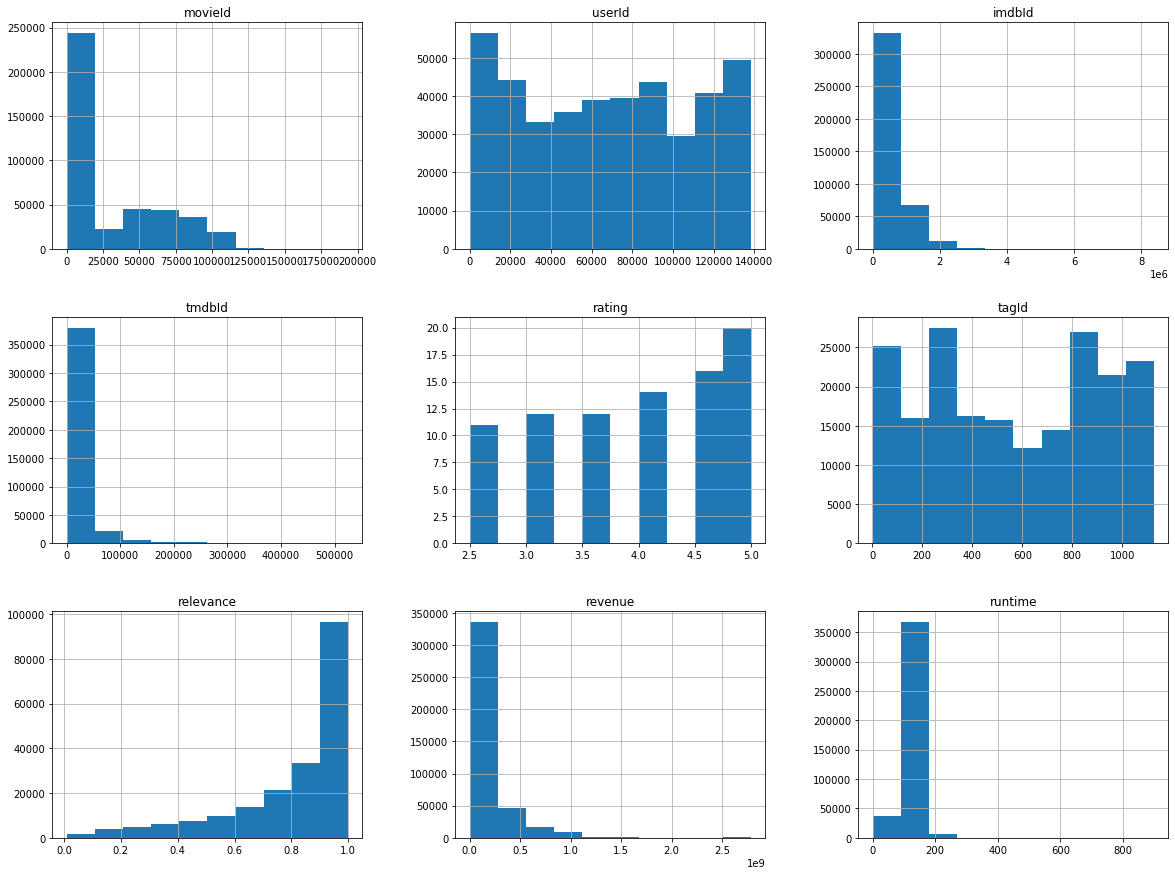

In [222]:
%matplotlib inline
import matplotlib.pyplot as plt


df.hist(bins=10, figsize=(20,15))

plt.show()

<AxesSubplot:>

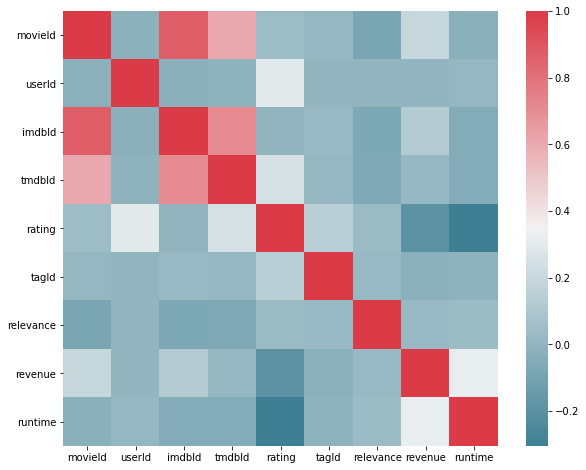

In [223]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)